In [173]:
from PIL import Image
import math
import numpy as np

In [211]:
class KMeans:
    
    def __init__(self, img_path, k=5):
        self.img = Image.open(img_path)
        self.img_copy = self.img.copy()
        self.pxl_map = self.img.load()
        self.k = k
        self.cluster_map = np.ones((self.img.height, self.img.width))
        self.centroids = self.random_centroids()
        self.converged = False
        
    def random_centroids(self):
        random_centroids = []
        for i in range(self.k):
            rand_x = np.random.rand() * self.img.width
            rand_y = np.random.rand() * self.img.height
            random_centroids.append((rand_x, rand_y))
        self.centroids = random_centroids
        return random_centroids
    
    def euclidian_distance(self, x1_y1, x2_y2):
        return math.sqrt((x1_y1[0] - x2_y2[0])**2 + (x1_y1[1] - x2_y2[1])**2 + (x1_y1[2] - x2_y2[2])**2)
    
    def assign_index(self):
        cluster_map = self.cluster_map
        for x in range(self.img.width):
            for y in range(self.img.height):
                dist = []
                for i in range(self.k):
                    cluster_pixel = self.img_copy.getpixel(self.centroids[i])
                    point_pixel = self.img_copy.getpixel((x,y))
                    euclidian_dist = self.euclidian_distance(cluster_pixel, point_pixel)
                    dist.append(euclidian_dist)
                index = dist.index(min(dist)) + 1
                cluster_map[y][x] = index
                self.pxl_map[x,y] = self.img_copy.getpixel(self.centroids[index -1])
        if (cluster_map == self.cluster_map).all(): # Check convergence.
            self.converged = True
        self.cluster_map = cluster_map
        return cluster_map
    
    def new_means(self):
        cl_map = self.assign_index()
        cl_indexes = np.unique(cl_map)
        new_centroids = []
        for i in cl_indexes:
            x_vals = y_vals = n = 0
            for x in range(self.img.height):
                for y in range(self.img.width):
                    if cl_map[x,y] == i:
                        x_vals += x
                        y_vals += y
                        n += 1
            new_centroids.append((x_vals/n, y_vals/n))
        self.centroids = new_centroids
    
    def cluster(self):
        while self.converged == False:
            self.new_means()
            self.assign_index()   

In [212]:
k_means = KMeans("view.jpg", k=5)
k_means.cluster()

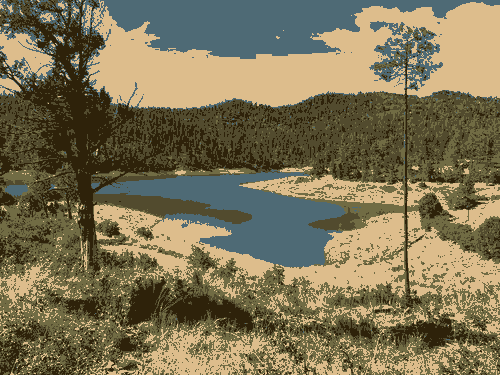

In [213]:
k_means.img